## FUNCIONES

In [1]:
import numpy as np 
import pandas as pd
import random
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# from mis_funciones import *


def angulos_iniciales(thetamax, phimax):
    '''
    Función para generar los angulos iniciales desde el origen de coordenadas,

    thetamax: ángulo theta máximo en radianes
    phimax: ángulo phi máximo en radianes
    '''
    
    theta_inicial = random.uniform(0, thetamax)
    phi_inicial = random.uniform(0, phimax)

    return theta_inicial, phi_inicial

def radianes_grados(angulo):
    return angulo*180/np.pi

def coor_inc_material(theta, phi, distancia_fuente_material):
    '''
    Coordenadas del punto de incidencia en el material. 

    theta: ángulo theta de la trayectoria inicial
    phi: ángulo phi de la trayectoria inicial 
    distancia_fuente_material: distancia entre la fuente de fotones y el material absorbente 

    En esta primera interacción los ángulos no cambian
    '''
    sentheta = np.sin(theta)
    costheta = np.cos(theta)
    tantheta = sentheta/costheta

    z = distancia_fuente_material
    x = z * tantheta * np.cos(phi)
    y = z * tantheta * np.sin(phi)

    return x, y, z

def recorrido_libre_medio(a):
    '''
    Recorrido libre medio de un fotón dentro de un material con un coeficiente de atenuación a. Es equivalente 
    a decir que es la distancia que recorre un fotón hasta interaccionar

    a: coeficiente de atenuación
    '''

    x = -1/(a * np.log(random.uniform(0,1)))
    return x

def coordenadas_material(z_0, theta_0, phi_0, recorrido_libre_medio):
    '''
    Función para cambiar la trayectoria del fotón

    z_0: coordenada z
    theta_0: angulo plano ZY
    phi_0: angulo de revolución
    recorrido_libre_medio: modulo de la distancia recorrida dentro del material antes de interaccionar
    '''
    theta_nueva = random.uniform(-theta_0,theta_0)
    phi_nuevo = random.uniform(-phi_0,phi_0)

    sentheta = np.sin(theta_nueva)
    costheta = np.cos(theta_nueva)
    senphi = np.sin(phi_nuevo)
    cosphi = np.cos(phi_nuevo)

    z_nuevo = z_0 + recorrido_libre_medio * costheta
    x_nuevo = recorrido_libre_medio * sentheta * cosphi
    y_nuevo = recorrido_libre_medio * sentheta * senphi

    return x_nuevo, y_nuevo, z_nuevo, theta_nueva, phi_nuevo

def perdida_energia(energía_foton):
    '''
    Función para registrar la cesión de energía de cada interacción

    energia_foton: Energía del fotón antes de la interacción
    '''
    energia_cedida = energía_foton * np.round(np.random.rand(), 4)
    energia_foton_nueva = energía_foton - energia_cedida

    return energia_cedida, energia_foton_nueva

C:\Users\an199\AppData\Local\Temp\ipykernel_15968\3950614103.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## PROGRAMA PRINCIPAL

          x             y         z     theta       phi  energía cedida
0  0.000000  0.000000e+00  0.000000  0.000000  0.000000        0.000000
1  1.250223  6.600327e-01  2.000000  0.615327  0.485743        0.000000
1 -0.259851  1.191004e-03  3.205364 -0.212332 -0.004583        1.401900
2  0.067839  1.876439e-04  4.436553  0.055045  0.002766        0.129926
3 -0.022523  1.297538e-05  5.669404 -0.018267 -0.000576        0.861378
4 -0.016160  1.577506e-06  6.902354 -0.013106 -0.000098        0.144114
5 -0.009605  4.274140e-07  8.135373 -0.007790 -0.000044        0.103780

Recorrido libre medio: 1.2330562358831534

Energía con la que sale del material: 0.3589026893491486


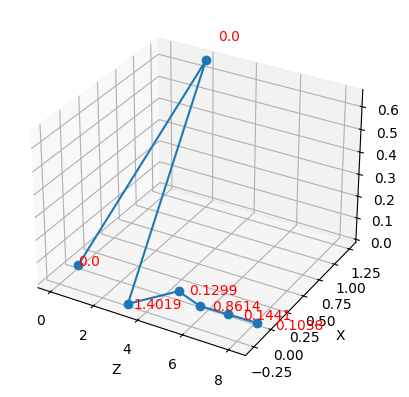

In [2]:
# Datos de entrada para la simluación
thetamax = np.pi/4
phimax = np.pi/4
distancia_fuente_material = 2
grosor_material = 6
rho_mu = 0.1 # coeficiente de atenuación másico
energia_foton = 3

theta_0, phi_0 = angulos_iniciales(thetamax, phimax)

x_0, y_0, z_0 = coor_inc_material(theta_0, phi_0, distancia_fuente_material)

'''
Pongo como comentario la linea real para generar el recorrido libre medio porque 
suele salir muy grande y necesitaría tomar distancias del material mucho mas grandes, y no quiero usar 
valores muy grandes de momento
'''
#modulo_trayectorias = recorrido_libre_medio(rho_mu)
modulo_trayectorias = random.uniform(1,2)

z = distancia_fuente_material

# Crear un diccionario con las coordenadas en la fuente y en el primer plano del material
data = {
    'x': [0, x_0],
    'y': [0, y_0],
    'z': [0, z_0],
    'theta': [0, theta_0],
    'phi': [0, phi_0],
    'energía cedida': [0] * 2
}

# Crear un DataFrame a partir del diccionario
df = pd.DataFrame(data)

z = distancia_fuente_material
i = 1

while (z < distancia_fuente_material + grosor_material) & (energia_foton != 0):
    '''
    En este bucle aplicamos la función para calcular las nuevas trayectorias dentro del material hasta 
    que el fotón sale del material.
    '''
    z_antiguo = df.iloc[i]['z']
    theta_antiguo = df.iloc[i]['theta']
    phi_antiguo = df.iloc[i]['phi']

    x_nuevo, y_nuevo, z_nuevo, theta_nueva, phi_nuevo = coordenadas_material(z_antiguo, theta_antiguo, phi_antiguo, modulo_trayectorias)
    energia_cedida, energia_foton = perdida_energia(energia_foton)

    nuevo_punto_de_interaccion = {
    'x': [x_nuevo],
    'y': [y_nuevo],
    'z': [z_nuevo],
    'theta': [theta_nueva],
    'phi': [phi_nuevo],
    'energía cedida': [energia_cedida]
    }

    # Crear un DataFrame a partir del diccionario con un índice específico
    nueva_fila = pd.DataFrame(nuevo_punto_de_interaccion, index=[i])  # Utiliza el índice 'i' para la nueva fila

    # Concatenar la nueva fila al DataFrame existente
    df = pd.concat([df, nueva_fila])
    z = z_nuevo
    i+=1

print(df)
print('\nRecorrido libre medio: ' + str(modulo_trayectorias))
print('\nEnergía con la que sale del material: ' + str(energia_foton))

# Crear una figura y un eje 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Graficar la trayectoria en 3D
ax.plot(df['z'], df['x'], df['y'], marker='o', linestyle='-')

# Plotear los puntos en 3D con anotaciones
for x, y, z, annotation in zip(df['z'], df['x'], df['y'], df['energía cedida']):
    ax.text(x * 1.1, y * 1.1, z * 1.1, str(np.round(annotation, 4)), color='red')

# Etiquetas de los ejes
ax.set_xlabel('Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')

# Mostrar el gráfico
plt.show()

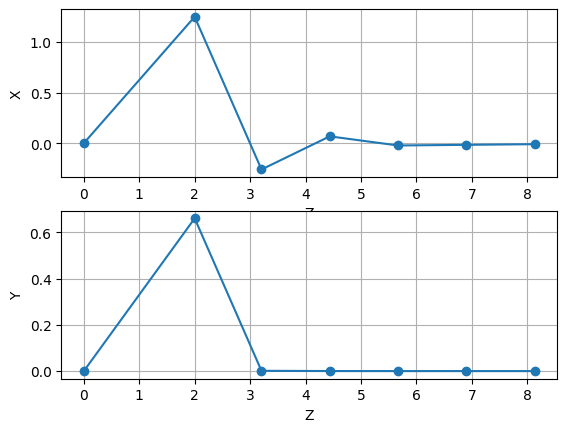

In [3]:
fig, axs = plt.subplots(2)

axs[0].plot(df['z'], df['x'], marker='o', linestyle='-')
axs[0].set_xlabel('Z')
axs[0].set_ylabel('X')
axs[0].grid(True)

axs[1].plot(df['z'], df['y'], marker='o', linestyle='-')
axs[1].set_xlabel('Z')
axs[1].set_ylabel('Y')
axs[1].grid(True)

plt.show()

